In [33]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

### Modeling Random Walk 4.1
* 1000 students, each time we flip a coin they randomly take a step to the left or right.  We need to assess where they would end up after 4, 8, 16 flips

In [37]:
steps_4 = np.random.uniform(-1,1,(1000,4))
steps_8 = np.random.uniform(-1,1,(1000,8))
steps_16 = np.random.uniform(-1,1,(1000,16))

steps_mult = np.hstack((np.mean(steps_4, axis=1).reshape(-1,1),
                        np.mean(steps_8, axis=1).reshape(-1,1),
                        np.mean(steps_16, axis=1).reshape(-1,1)))

steps_mult.shape

(1000, 3)

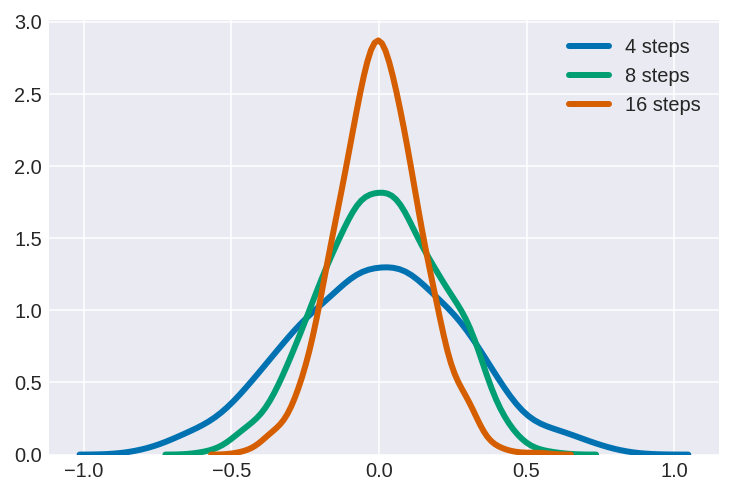

In [40]:
# List of 3 density plots
steps = ['4 steps', '8 steps', '16 steps']

# Iterate through the 3 steps
for idx, step in enumerate(steps):    
    # Draw the density plot
    sns.distplot(steps_mult[:,idx], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = steps[idx])